# overview of CSWOT23-DriX campaign


In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.xarray
import hvplot.pandas

import pynsitu as pin
crs = pin.maps.crs

import utils as ut
import cswot

---
## load data

In [2]:
# load campaign object
cp = pin.Campaign("cswot23.yaml")

In [3]:
# drix
uctd = cp.load("drix_underway_ctd_1T.nc").set_coords(["lon", "lat"])
met = cp.load("drix_met_1T.nc")
turb = cp.load("drix_turb_1T.nc").set_coords(["lon", "lat"])
#drix_ins = cp.load("drix_ins_10s.nc").sortby("time")

# meteo
arome = cp.load("arome.nc")
# interpolate along DriX trajectory
for v in ["ustress", "vstress", "u10m", "v10m"]:
    met["arome_"+v] = arome[v].interp(longitude=met.lon, latitude=met.lat, time=met.time)

sta_files = sorted(glob(os.path.join(cp["path_raw"], "ADCP/*.STA")))

adcp = ut.load_adcp_sta(sta_files, cp["start"], cp["end"])
#D_leg1 = ut.load_adcp_sta(sta_files, cp["leg1"].start.time, cp["leg1"].end.time)
#D_leg2 = ut.load_adcp_sta(sta_files, cp["leg2"].start.time, cp["leg2"].end.time)

# ships
#cpb = pin.Campaign("/home1/datahome/aponte/cswot_analysis/cswot23.yaml")
#te = cp.load("tethys_underway_1T.nc").set_coords(["lon", "lat"])
#at = cp.load("atalante_underway_1T.nc").set_coords(["lon", "lat"])

# load drifters
#dr = cp.load("drifters.nc").to_dataframe()

# swot
swot = cswot.load_swot_pass("med_north", start=cp["start"], end = cp["end"])

In [4]:
#adcp_drix_gf["E"].plot(y="z")
#adcp_europe_gf["E"].plot(y="z")
#adcp_europe_pf["E"].plot(y="z")

In [5]:
# interpolate arome on DriX trajectory
# _u10 = arome.u10m.interp(longitude=europe_underway.long, latitude=europe_underway.long, time=europe_underway.time)
# arome["u10m"].isel(longitude=10, latitude=10).plot()

### recover mission timeline

In [ ]:
(met["lon"].hvplot("time")
+met["lat"].hvplot("time")
+met["INS1_Gyro"].hvplot("time")
+met["velocity"].hvplot("time")
).cols(1)

---
## time line

Need to add wind and 

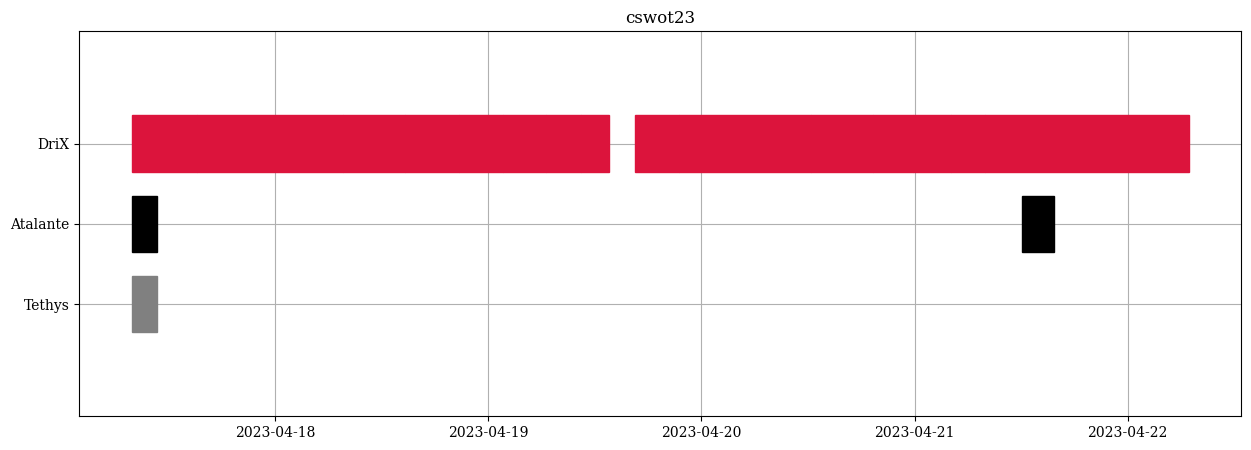

In [6]:
#ax = cp.timeline(height=0.7, sensors=False)
#ax = cp.timeline(height=0.7, deployments=True)
ax = cp.timeline(height=0.7, deployments=False, sensors=False, align_deployments=True, exclude=["global",])

with wind

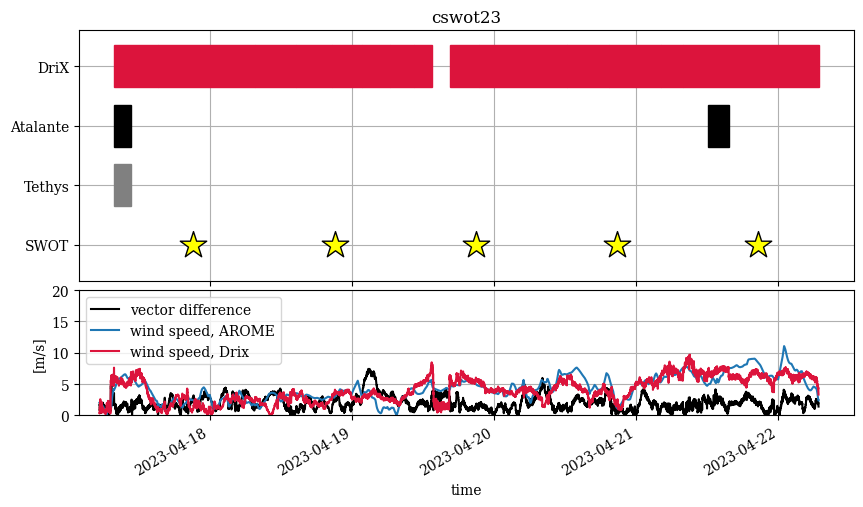

In [7]:
gs_kw = dict(
    width_ratios=[
        1,
    ],
    height_ratios=[2, 1],
    hspace=0.05,
)
fig, axd = plt.subplot_mosaic(
    [["top"], ["bottom"]],
    gridspec_kw=gs_kw,
    figsize=(10, 5),
    sharex=True,
    # layout="constrained",
)

ax = axd["top"]

#cp.timeline(height=0.7, ax=axd["top"])
#cp.timeline(height=0.7, ax=axd["top"], deployments=True, sensors=False, align_deployments=True, exclude=["global",])
cp.timeline(height=0.7, ax=ax, deployments=False, sensors=False, align_deployments=True, exclude=["global",])
ax.set_ylim(-3.6, 0.6)

ax.scatter(swot["Ascending"], -3*np.ones(swot["Ascending"].size), s=400, c="yellow", marker="*", edgecolor="k")
ax.set_yticks(np.append(ax.get_yticks(),-3))
tlabels = [t.get_text() for t in ax.get_yticklabels()]+["SWOT"]
tlabels = [t for t in tlabels if t!=""]
ax.set_yticklabels(tlabels)

###

ax = axd["bottom"]

_diff = np.sqrt( (met.wind_u_true - met.arome_u10m)**2 + (met.wind_v_true - met.arome_v10m)**2 )
_diff.plot(ax=ax, color="k", label="vector difference")

_speed, _heading = pin.uv2speedheading(met.arome_u10m, met.arome_v10m)
_speed.plot(ax=ax, label="wind speed, AROME")

_speed, _heading = pin.uv2speedheading(met.wind_u_true, met.wind_v_true)
_speed.plot(ax=ax, color="crimson", label="wind speed, Drix")

ax.set_ylim(0, 20)
ax.grid()
ax.set_ylabel("[m/s]")
ax.legend()
ax.set_title("");

---
## meteo overview

In [ ]:
#europe.to_pandas()[["trueairheading", "trueairspeed"]].plot(
#    subplots=True, grid=True
#)

In [ ]:
#europe.airpressure.plot(label="europe")
#drix_met.Pressure.plot(label="drix")

In [ ]:
rho_air = 1  # kg/m^3
dz = 10  # m
g = 9.81  # m/s^2
rho_air * g * dz / 100  # mbar

---
## underway overview

Text(0, 0.5, 'temperature [degC]')

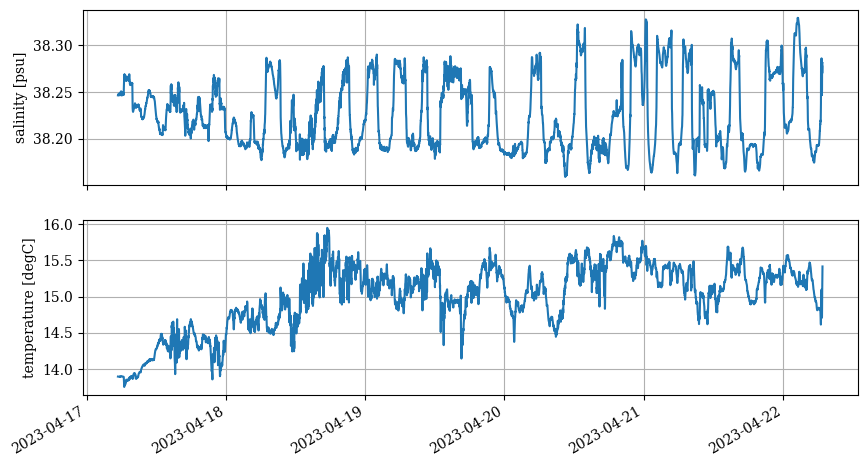

In [8]:
fig, axes = plt.subplots(2,1, figsize=(10,5), sharex=True)

ax = axes[0]
uctd.salinity.plot(ax=ax)
ax.grid()
ax.set_xlabel("")
ax.set_ylabel("salinity [psu]")

ax = axes[1]
uctd.temp.plot(ax=ax)
ax.grid()
ax.set_xlabel("")
ax.set_ylabel("temperature [degC]")


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


Text(0.5, 1.0, 'Drix surface salinity [psu]')

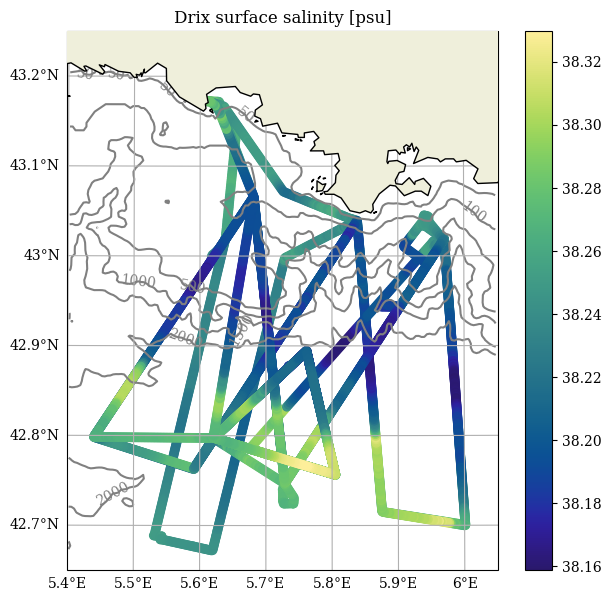

In [23]:
da = uctd.salinity

fig, ax, _ = cp.map(figsize=(7,7))
im = ax.scatter(da.lon, da.lat, c=da, transform=crs, cmap=pin.haline) # vmin=30
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface salinity [psu]")

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


Text(0.5, 1.0, 'Drix surface temperature [degC]')

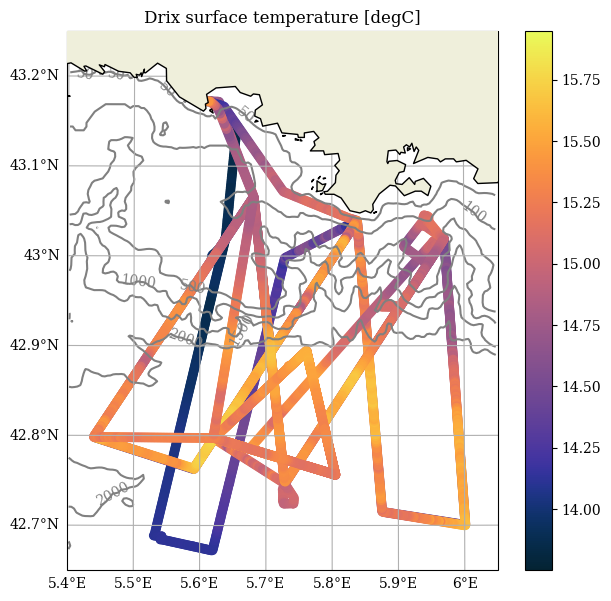

In [9]:
da = uctd.temp

fig, ax, _ = cp.map(figsize=(7,7))
im = ax.scatter(da.lon, da.lat, c=da, transform=crs, cmap=pin.thermal) # vmin=30
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface temperature [degC]")

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


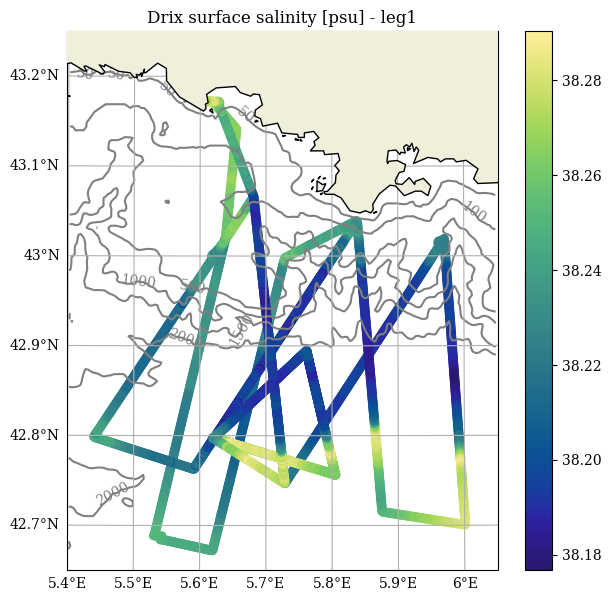

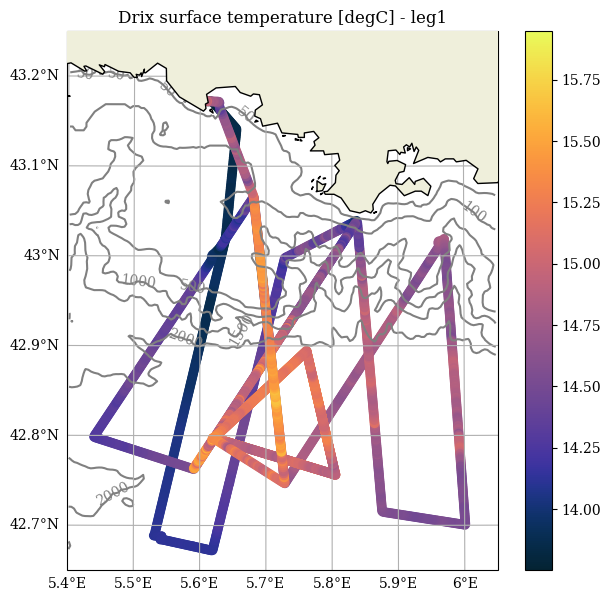

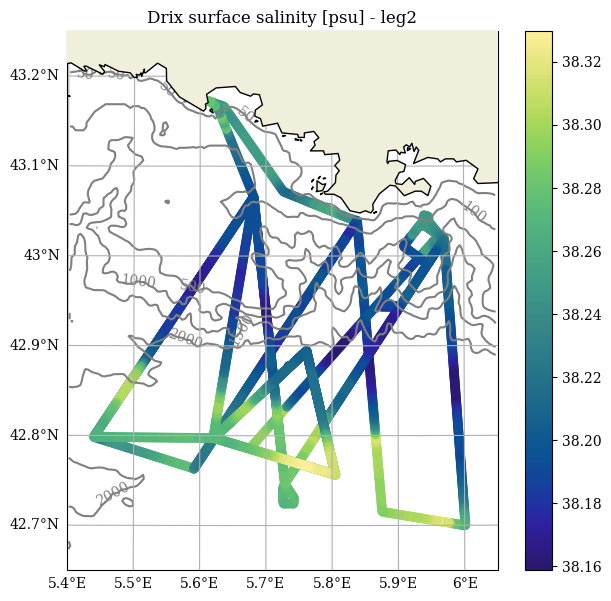

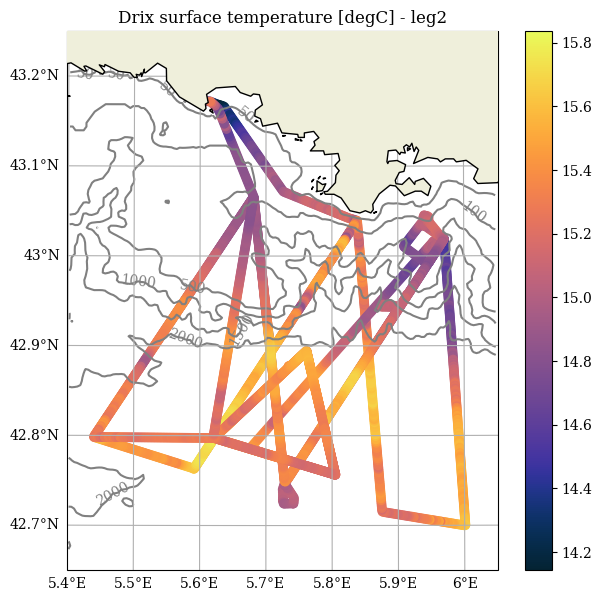

In [14]:
for d in ["leg1", "leg2"]:
    ds = uctd.ts.trim(cp[d])
    
    # salinity
    da = ds.salinity
    fig, ax, _ = cp.map(figsize=(7,7))
    im = ax.scatter(da.lon, da.lat, c=da, transform=crs, cmap=pin.haline) # vmin=30
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Drix surface salinity [psu] - {d}")
    
    # temperature
    da = ds.temp
    fig, ax, _ = cp.map(figsize=(7,7))
    im = ax.scatter(da.lon, da.lat, c=da, transform=crs, cmap=pin.thermal) # vmin=30
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Drix surface temperature [degC] - {d}")

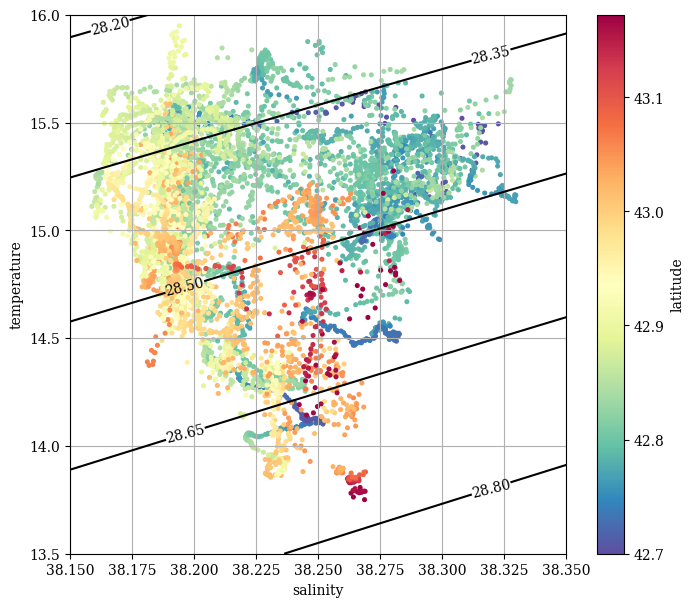

In [32]:
fig, ax = pin.seawater.plot_ts((38.15,38.35), (13.5, 16.), figsize=(8,7))

for d in ["leg1", "leg2"]:
    ds = uctd.ts.trim(cp[d])
    h = ax.scatter(ds.salinity, ds.temp, s=7, c=ds.lat, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(h)
cbar.set_label("latitude")

In [ ]:

da = drix_turb.turbidity_low_range
da = drix_turb.turbidity_high_range

#da = np.log10(da)

fac = pin.maps.plot_map(**kwargs_map, bathy_levels=cp.bathy["levels"])
fig, ax = fac["fig"], fac["ax"]
#im = ax.scatter(da.lon, da.lat, c=da, transform=crs)
im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmin=10, vmax = 17)
#im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmax = 1.5)
#im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmin=-.1, vmax=0.1)
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface turbidity [1]")

ax.scatter(
    [d.start.lon for d in cp["ctd_europe"]],
    [d.start.lat for d in cp["ctd_europe"]],
    s=20,
    c="white",
    edgecolor=None,
    marker="*",
    transform=crs,
)

---

## all time series

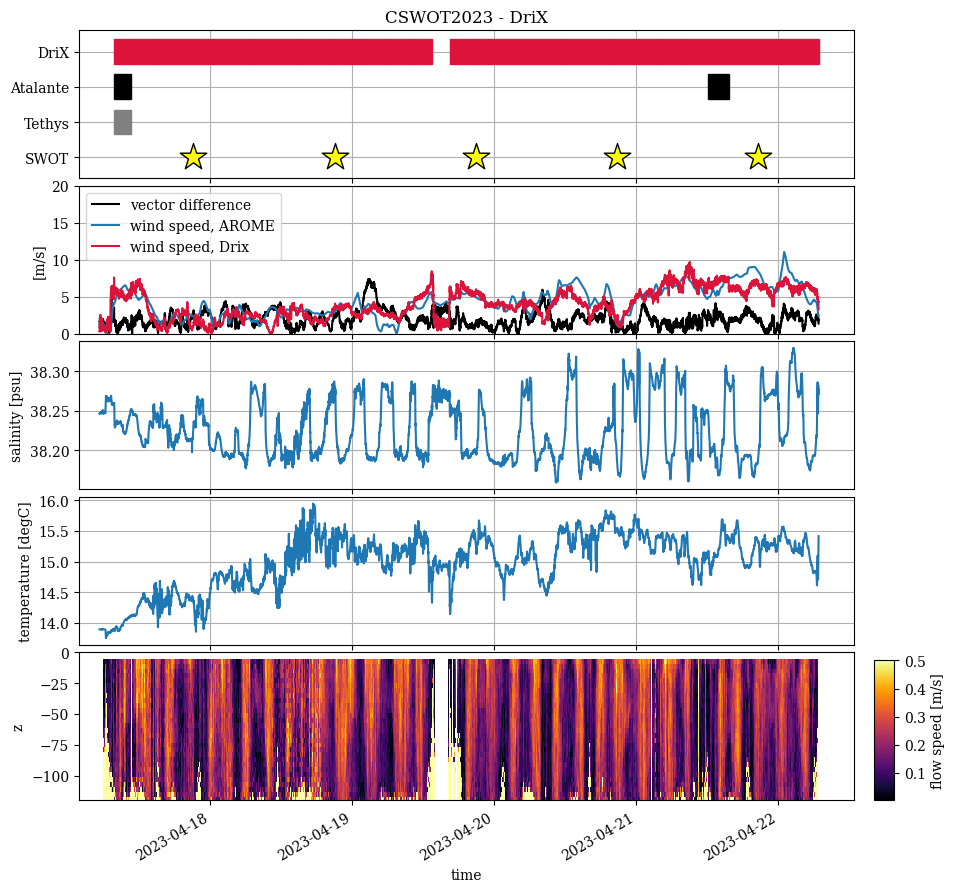

In [14]:
gs_kw = dict(
    width_ratios=[
        1,
    ],
    height_ratios=[1, 1, 1, 1, 1],
    hspace=0.05,
)
fig, axd = plt.subplot_mosaic(
    [["f0"], ["f1"], ["f2"], ["f3"], ["f4"]],
    gridspec_kw=gs_kw,
    figsize=(10, 10),
    sharex=True,
    # layout="constrained",
)

###

ax = axd["f0"]

#cp.timeline(height=0.7, ax=axd["top"])
#cp.timeline(height=0.7, ax=axd["top"], deployments=True, sensors=False, align_deployments=True, exclude=["global",])
cp.timeline(height=0.7, ax=ax, deployments=False, sensors=False, align_deployments=True, exclude=["global",])
ax.set_ylim(-3.6, 0.6)

ax.scatter(swot["Ascending"], -3*np.ones(swot["Ascending"].size), s=400, c="yellow", marker="*", edgecolor="k")
ax.set_yticks(np.append(ax.get_yticks(),-3))
tlabels = [t.get_text() for t in ax.get_yticklabels()]+["SWOT"]
tlabels = [t for t in tlabels if t!=""]
ax.set_yticklabels(tlabels)

ax.set_title("CSWOT2023 - DriX")

### meteo

ax = axd["f1"]

_diff = np.sqrt( (met.wind_u_true - met.arome_u10m)**2 + (met.wind_v_true - met.arome_v10m)**2 )
_diff.plot(ax=ax, color="k", label="vector difference")

_speed, _heading = pin.uv2speedheading(met.arome_u10m, met.arome_v10m)
_speed.plot(ax=ax, label="wind speed, AROME")

_speed, _heading = pin.uv2speedheading(met.wind_u_true, met.wind_v_true)
_speed.plot(ax=ax, color="crimson", label="wind speed, Drix")

ax.set_ylim(0, 20)
ax.grid()
ax.set_ylabel("[m/s]")
ax.legend()
ax.set_title("")

### underway

ax = axd["f2"]
uctd.salinity.plot(ax=ax)
ax.grid()
ax.set_xlabel("")
ax.set_ylabel("salinity [psu]")

ax = axd["f3"]
uctd.temp.plot(ax=ax)
ax.grid()
ax.set_xlabel("")
ax.set_ylabel("temperature [degC]")


### velocity
ax = axd["f4"]
xlim0 = ax.get_xlim()
bbox = ax.get_window_extent()
for d in adcp:
    h = d["compensated_Mag"].plot(y="z", vmax=0.5, cmap="inferno", ax=ax, add_colorbar=False)
ax.set_ylim(-120, 0)
ax.set_xlim(xlim0)

cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.14])
cbar = fig.colorbar(h, cax=cbar_ax)
cbar.set_label("flow speed [m/s]")

---

## movie


In [ ]:
kwargs_map

In [ ]:
def make_movie(
    cp,
    tstart,
    tend,
    drifters=None,
    ship=False,
    wind=None,
    ctd=None,
    bounds=None,
    istart=None,
    dt="10T",
    del_t="1H",  # trail behing ships
    wind_arrow_scale=1,
    wind_di=4,
    wind_offset=0,
):
    """Make a movie"""

    from tqdm import tqdm

    t_range = pd.date_range(tstart, tend, freq=dt)
    del_t = pd.Timedelta(del_t)

    _kwargs_map = dict(**kwargs_map)
    if isinstance(bounds, float):
        _kwargs_map["figsize"] = (7, 7)

    plt.switch_backend("agg")

    # fig_dir = os.path.join(cp.pathp, 'figs/')
    fig_dir = "/Users/aponte/tmp/figs/"

    europe_col = cp["adcp_europe"]["color"]
    drix_col = cp["adcp_drix"]["color"]

    i = -1
    for t in tqdm(t_range):
        i += 1

        if i < istart:
            continue

        _ds = europe.sel(time=t, method="nearest")
        if isinstance(bounds, float) and _ds.time.size > 0:
            _ds = europe.sel(time=t, method="nearest")
            lon, lat = float(_ds["lon"]), float(_ds["lat"])
            dlon = bounds / np.cos(lat * pin.deg2rad) * 0.5
            dlat = bounds * 0.5
            _kwargs_map["extent"] = [lon - dlon, lon + dlon, lat - dlat, lat + dlat]
        fac = pin.maps.plot_map(**_kwargs_map, bathy_levels=cp.bathy["levels"])
        fig, ax = fac["fig"], fac["ax"]
        # fig, ax, crs = cp.plot_map(figsize=(10,10), bounds=bounds,
        #                           coast="bseine", land=None, rivers="bseine",
        # )

        # ship
        if ship:
            # europe
            _ds = europe.sel(time=slice(t - del_t, t))
            ax.plot(
                _ds["lon"], _ds["lat"], lw=3, color=europe_col, alpha=1, transform=crs
            )
            ax.scatter(
                _ds["lon"][-1],
                _ds["lat"][-1],
                s=10,
                c="0.7",
                marker="o",
                edgecolors="k",
                linewidths=0.5,
                transform=crs,
                zorder=10,
            )
            # drix
            # _ds = drix.sel(time=slice(t-del_t,t))
            # ax.plot(_ds['lon'], _ds['lat'], lw=1, color=drix_col, alpha=.8, transform=crs)
            _ds = drix_ins.sel(time=slice(t - del_t, t))
            ax.plot(
                _ds["longitude"],
                _ds["latitude"],
                lw=1,
                color=drix_col,
                alpha=1,
                transform=crs,
            )
            if _ds.time.size > 0:
                ax.scatter(
                    _ds["longitude"][-1],
                    _ds["latitude"][-1],
                    s=10,
                    c="0.7",
                    marker="o",
                    edgecolors="k",
                    linewidths=0.5,
                    transform=crs,
                    zorder=10,
                )

        # wind
        if wind is not None:
            qkwargs = dict(
                scale=2e2 / wind_arrow_scale,
                width=2e-3 * wind_arrow_scale,
                transform=crs,
                zorder=1,
                add_guide=False,
            )
            #
            _di = wind_di
            _ds = wind.interp(time=t).isel(
                longitude=slice(0, None, _di), latitude=slice(0, None, _di)
            )
            q = _ds.plot.quiver(
                x="longitude", y="latitude", u="u10m", v="v10m", color="0.5", **qkwargs
            )
            qk = ax.quiverkey(
                q,
                0.1,
                0.9,
                10,
                "10 m/s",
                transform=crs,
                color="0.5",
                labelpos="W",
                coordinates="axes",
                zorder=100,
            )
            # europe wind
            _ds = europe.interp(time=t).expand_dims(dict(dum=2))
            _ds["wind_u_true"], _ds["wind_v_true"] = pin.speedheading2uv(
                _ds.trueairspeed, _ds.trueairheading
            )
            _ds["lat"] = _ds["lat"] + wind_offset
            q = _ds.plot.quiver(
                x="lon",
                y="lat",
                u="wind_u_true",
                v="wind_v_true",
                color=europe_col,
                **qkwargs,
            )
            # drix wind
            _ds = drix_met.interp(time=t).expand_dims(dict(dum=2))
            _ds["lat"] = _ds["lat"] + wind_offset
            q = _ds.plot.quiver(
                x="lon",
                y="lat",
                u="wind_u_true",
                v="wind_v_true",
                color=drix_col,
                **qkwargs,
            )

        # drifters
        if drifters is not None:
            # ids = dr.index.unique()
            ids = [
                u for u in cp if "0-435" in u
            ]  # prefered as if leads to correct color ordering in legend
            colors = pin.get_cmap_colors(len(ids))
            for idx, c in zip(ids, colors):
                df = dr.loc[idx]
                for d in df["deployment"].unique():
                    _df = (
                        df.loc[df.deployment == d]
                        .set_index("time")
                        .resample("1s")
                        .interpolate()
                    )
                    _df = _df.loc[t - del_t : t]
                    if _df.index.size > 0:
                        ax.plot(
                            _df.longitude,
                            _df.latitude,
                            color=c,  # cp[idx]["color"]
                            transform=crs,
                            label=f"{idx}, {d}",
                            lw=2,
                        )
                        ax.plot(
                            _df.longitude[-1],
                            _df.latitude[-1],
                            color=c,  # cp[idx]["color"]
                            marker="*",
                            markeredgecolor="k",
                            markeredgewidth=0.5,
                            transform=crs,
                            label=f"{idx}, {d}",
                            lw=2,
                            markersize=10,
                        )

        # add pool of isolated events

        # cp.add_legend(ax, loc=4, colors={idx: c for idx, c in zip(ids, colors)})
        ax.set_title(cp.name + "  " + str(t))

        figname = os.path.join(fig_dir, "fig_t%05d" % (i) + ".png")
        _ = fig.savefig(figname, dpi=150, facecolor="w")  # bbox_inches = 'tight'
        _ = fig.clf()


import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
part = "drifters"

# bounds, istart = None, 0,
bounds, istart = 0.25, 0
dt = "5T"

if part == "all":
    tstart = cp.start
    # tstart = '2022-05-11 05:00:00'
    tend = cp.end
    # dev
    # tstart = cp.start + pd.Timedelta("9H")
    # tend = cp.start + pd.Timedelta("10H") # dev
    # tend = '2022-05-13 10:00:00'
    # bounds = [-.3, .05, 49.25, 49.45]
elif part == "drifters":
    tstart = "2022-09-23 05:30:00"
    tend = "2022-09-23 16:10:00"
    bounds = 0.1
    dt = "30s"

kwargs = dict(
    drifters=dr,
    ship=True,
    wind=arome,
    bounds=bounds,
    istart=istart,
    dt=dt,
    del_t="1H",
)
kwargs.update(wind_arrow_scale=3, wind_di=2, wind_offset=0.02)

# dr = None
make_movie(cp, tstart, tend, **kwargs)

In [ ]:
def make_movie(
    cp,
    drifters=None,
    wind=None,
    istart=0,
):
    """Make a movie"""

    from tqdm import tqdm

    plt.switch_backend("agg")
    fig_dir = os.path.join(cp.pathp, "figs/")

    del_t = pd.Timedelta("2H")

    dl = 5e3
    xlims = (-dl, dl)
    ylims = (-dl, dl)

    i = -1
    for t in tqdm(drifters.time):
        i += 1

        if i < istart:
            continue

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        ds = drifters.sel(time=slice(t - del_t, t))

        # wind
        if wind is not None:
            _di = 2
            _ds = wind.interp(time=t).isel(
                longitude=slice(0, None, _di), latitude=slice(0, None, _di)
            )
            q = _ds.plot.quiver(
                x="longitude",
                y="latitude",
                u="u10m",
                v="v10m",
                scale=1e2,
                transform=crs,
                zorder=-2,
            )
            qk = ax.quiverkey(
                q,
                0.1,
                0.9,
                10,
                "10 m/s",
                transform=crs,
                color="r",
                labelpos="W",
                coordinates="axes",
                zorder=10,
            )

        # drifters
        # ids = dr.index.unique()
        ids = [
            u for u in cp if "0-435" in u
        ]  # prefered as if leads to correct color ordering in legend
        colors = pin.get_cmap_colors(len(ids))
        for idx, c in zip(ids, colors):
            _ds = ds.sel(id=idx)
            if _ds.time.size > 0:
                ax.plot(_ds.x_prime, _ds.y_prime, color=c, lw=2)

        ax.set_xlim(*xlims)
        ax.set_ylim(*ylims)
        ax.set_aspect("equal")
        ax.grid()

        cp.add_legend(ax, loc=4, colors={idx: c for idx, c in zip(ids, colors)})
        ax.set_title(cp.name + "  " + str(t.values))

        figname = fig_dir + "fig_t%05d" % (i) + ".png"
        _ = fig.savefig(figname, dpi=150, facecolor="w", bbox_inches="tight")
        _ = fig.clf()


import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
### taos0 - drifters0
bounds, istart = None, 0
if campaign == "taos0_drifters0":
    tstart = "2022-05-11 05:00:00"
    tend = "2022-05-11 09:00:00"
    # tend = '2022-05-13 10:00:00'
elif campaign == "taos0_drifters1":
    tstart = "2022-05-17 08:00:00"
    # tend = '2022-05-17 09:00:00'
    tend = "2022-05-19 13:30:00"
    # istart = 315

make_movie(cp, ds)